# Lending Club Loan Data Analysis.
 (Course-end Project 1)

## DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 
## Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.


## Dataset columns and definition:


- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.

- days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

## Steps to perform:

- Perform exploratory data analysis and feature engineering and then apply feature engineering. 
- Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

## Target is ['not.fully.paid']

# 1. Libraries:

In [713]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# 2. Dataset:

In [2]:
df = pd.read_csv('datasets/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# 3. EDA

In [3]:
df.info(memory_usage='deep', verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.6 MB


- This dataset has 14 features: six floats, 7 integer, and one object.
- No missing values

In [4]:
#MIssing data
df.isnull().mean()

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [5]:
df.nunique().sort_values()

credit.policy           2
not.fully.paid          2
pub.rec                 6
purpose                 7
delinq.2yrs            11
inq.last.6mths         28
fico                   44
int.rate              249
revol.util           1035
log.annual.inc       1987
dti                  2529
days.with.cr.line    2687
installment          4788
revol.bal            7869
dtype: int64

In [711]:
# Skewness:
df.skew()

C:\Users\NVK\AppData\Local\Temp\ipykernel_20340\3234542792.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64

- features such as revol.bal, inq.last.6mths, delinq.2yrs, pub.rec are significantly skewed.

<AxesSubplot:>

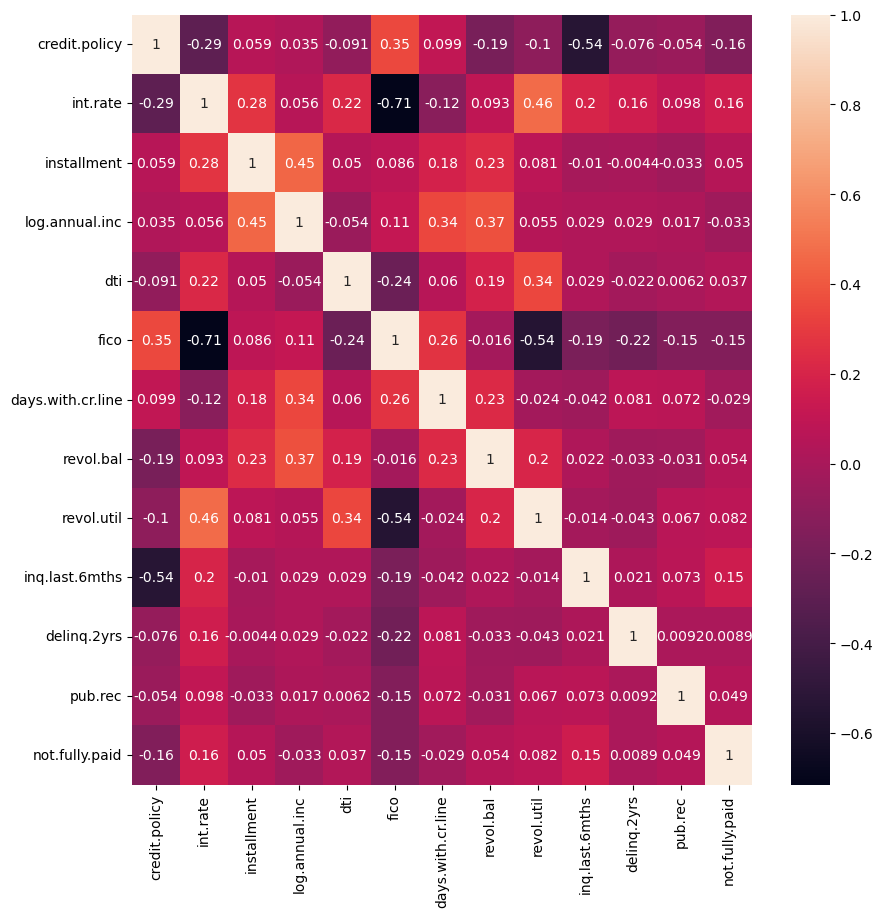

In [712]:
# Correlations:

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)

- the target 'not.fully.paid' does not strong correlate with any of independent veriables (the max is 0.16). The strongest correlations were found with credit.policy, int.rate, fico and inq.last.6monthd

In [337]:
# Correlations between target=['not.fully.paid'] and other independent veriables:

df.corr().abs()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.159552
credit.policy        0.158119
fico                 0.149666
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
log.annual.inc       0.033439
days.with.cr.line    0.029237
delinq.2yrs          0.008881
Name: not.fully.paid, dtype: float64

In [24]:
# Target
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

data imbalansed

- Target is imbalansed.

- Note: good explanations about imbalance dataset and how to fix it.
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

# 4. Feature Engineering:

In [438]:
# import library


# Split dataset and Drop Columns:

X = df.drop(columns=['not.fully.paid'])
#X = df[["int.rate", "fico", "credit.policy", "inq.last.6mths", "revol.util", "revol.bal", "installment", "purpose"]]

y= df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state = 42)



In [440]:
# Categorical Encoder to encode object variable ['purpose']

from feature_engine.encoding import OrdinalEncoder

cat_encoder = OrdinalEncoder(encoding_method='arbitrary')

cat_encoder.fit(X_train,y_train)

X_train = cat_encoder.transform(X_train)
X_test = cat_encoder.transform(X_test)

In [441]:
# To fix Outliers

from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method="gaussian", tail="both")

capper.fit(X_train)
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

In [442]:
# Data Transformation to fix skewness:

from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()

yeo_trans.fit(X_train)

X_train = yeo_trans.transform(X_train)
X_test = yeo_trans.transform(X_test)

In [443]:
# Scaling data:

from sklearn.preprocessing import RobustScaler, StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

scaler_rub = SklearnTransformerWrapper(transformer=StandardScaler())

scaler_rub.fit(X_train)
X_train = scaler_rub.transform(X_train)
X_test = scaler_rub.transform(X_test)

In [722]:
# To balance data target:

smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Note:** Test showed that sinthetically created balanced dataset does not work well.

# 5. Deep Learning Model

## 5.1. Model with original dataset:

In [518]:
model_3 = Sequential([
            Dense(36, activation='relu', input_shape=[13]),
            BatchNormalization(),
            Dense(18, activation='relu'),    
            BatchNormalization(),
            Dropout(0.55),
            Dense(1, activation='sigmoid'),
  ])


In [519]:
model_3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [520]:
BATCH_SIZE = 200

history = model_3.fit(
                    X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=100,
                    #validation_data=(X_test, y_test),
                    validation_split=0.20,
                    shuffle=True,
                    verbose=1
                    )

Epoch 1/100
37/37 [==============================] - 1s 4ms/step - loss: 0.9419 - binary_accuracy: 0.5454 - val_loss: 0.6667 - val_binary_accuracy: 0.6434
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7644 - binary_accuracy: 0.5913 - val_loss: 0.5855 - val_binary_accuracy: 0.7978
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6953 - binary_accuracy: 0.6362 - val_loss: 0.5382 - val_binary_accuracy: 0.8242
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6469 - binary_accuracy: 0.6674 - val_loss: 0.5099 - val_binary_accuracy: 0.8324
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6047 - binary_accuracy: 0.6986 - val_loss: 0.4886 - val_binary_accuracy: 0.8374
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5793 - binary_accuracy: 0.7274 - val_loss: 0.4733 - val_binary_accuracy: 0.8368
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - los

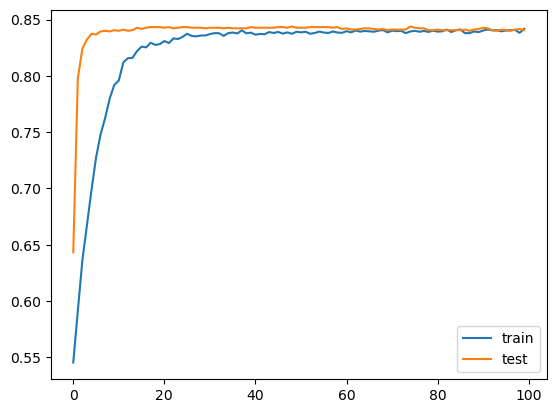

In [521]:
# With REgulization

plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

In [522]:
model_3.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 3ms/step - loss: 0.3815 - binary_accuracy: 0.8622


[0.3815496265888214, 0.8622129559516907]

Accuracy Model: 86.22%

## 5.2. Model with sinthetically balanced data (SMOTE):

In [776]:
model_smote = Sequential([
            Dense(256, activation='relu', input_shape=[13]),
            BatchNormalization(),
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dense(128, activation='relu'),    
            BatchNormalization(),    
            Dropout(0.65),
            Dense(1, activation='sigmoid'),
  ])


In [777]:
model_smote.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [778]:
BATCH_SIZE = 200

history = model_smote.fit(
                    X_train_smote,
                    y_train_smote,
                    batch_size=BATCH_SIZE,
                    epochs=400,
                    #validation_data=(X_test, y_test),
                    validation_split=0.20,
                    shuffle=True,
                    verbose=1
                    )

Epoch 1/400
62/62 [==============================] - 1s 6ms/step - loss: 0.8667 - binary_accuracy: 0.5858 - val_loss: 0.9248 - val_binary_accuracy: 0.0534
Epoch 2/400
62/62 [==============================] - 0s 4ms/step - loss: 0.7172 - binary_accuracy: 0.6311 - val_loss: 0.9719 - val_binary_accuracy: 0.0501
Epoch 3/400
62/62 [==============================] - 0s 4ms/step - loss: 0.6602 - binary_accuracy: 0.6485 - val_loss: 0.9081 - val_binary_accuracy: 0.1732
Epoch 4/400
62/62 [==============================] - 0s 4ms/step - loss: 0.6269 - binary_accuracy: 0.6549 - val_loss: 0.7946 - val_binary_accuracy: 0.3196
Epoch 5/400
62/62 [==============================] - 0s 4ms/step - loss: 0.6051 - binary_accuracy: 0.6652 - val_loss: 0.7727 - val_binary_accuracy: 0.3854
Epoch 6/400
62/62 [==============================] - 0s 4ms/step - loss: 0.5865 - binary_accuracy: 0.6846 - val_loss: 0.7185 - val_binary_accuracy: 0.5000
Epoch 7/400
62/62 [==============================] - 0s 4ms/step - los

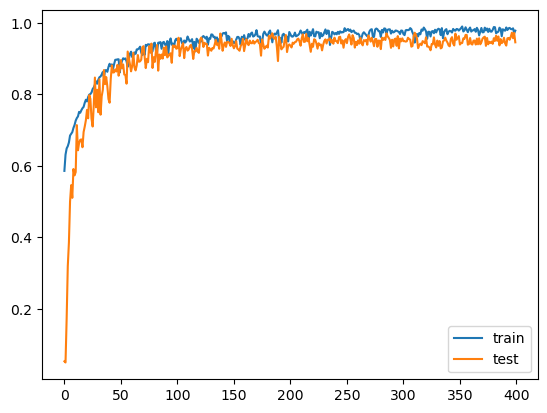

In [779]:
# With REgulization

plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

In [780]:
model_smote.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 2ms/step - loss: 1.4128 - binary_accuracy: 0.7850


[1.4128310680389404, 0.7849686741828918]

Accuracy Model: 78.50%

# 6. Confusion Matrix for model with original dataset:

**Function to plot Confusion Matrix**:

- This function came from scikit-learn's website. 
- This is code that they provide to plot the confusion matrix.

In [806]:
# Function to plot Confusion Matrix.
# This function came from scikit-learn's website. 
#This is code that they provide to plot the confusion matrix.

from itertools import product  #you will need this. Otherwise, there is a problem with intertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Original
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):   # Modified. Because gave problem with "intertools is not defined"
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 6.1. Confusion Matrix for the model with original dataset:

In [809]:
predictions = np.rint(model_3.predict(X_test)) # used riny to round predictions to int

15/15 [==============================] - 0s 714us/step


In [810]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

In [811]:
cm_plot_labels = ['return','no return']

Confusion matrix, without normalization
[[408   2]
 [ 64   5]]


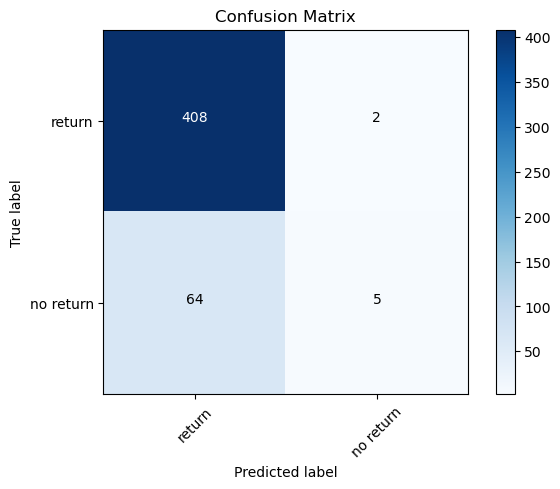

In [812]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## 6.2. Confusion Matrix for the sinthetically balanced data (SMOTE):

In [813]:
predictions_smote = np.rint(model_smote.predict(X_test)) # used riny to round predictions to int

15/15 [==============================] - 0s 1ms/step


In [814]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions_smote)

In [815]:
cm_plot_labels = ['return','no return']

Confusion matrix, without normalization
[[360  50]
 [ 53  16]]


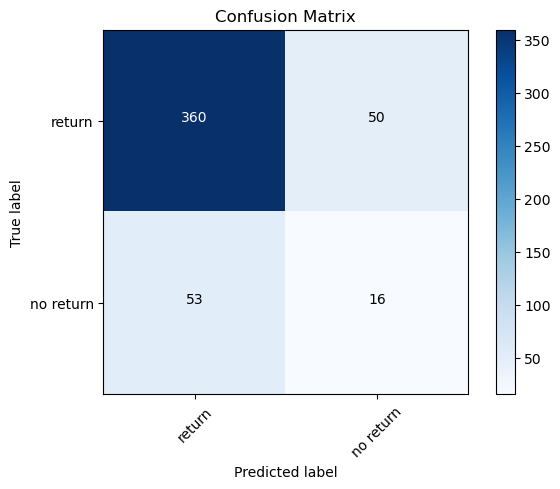

In [816]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 7. Conclutions:

# Conclution:

- The best performance was obtained with original dataset after Feature Engineering (Categorical Encoder, Outliers and Scaler).
- Accuracy of this model is 86.22%.

- Model with sinthetically balanced data (SMOTE)  required more layers and accuracy just 78.50%.
